In [1]:
import numpy as np
import torch

seed = 42 #424
np.random.seed(seed)
torch.manual_seed(seed)
#NOTE! This only works for non cudnn. gpu needs
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

from helpers import showcase_code

import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
import pickle

from experimentation import ExperimentAnalyzer
import os
import time
import pandas as pd

In [2]:
# for working with external files, otherwise kernels needs to be restarted each time
%load_ext autoreload
%autoreload 2

import numpy as np
import torch

seed = 42 #424
np.random.seed(seed)
torch.manual_seed(seed)
#NOTE! This only works for non cudnn. gpu needs
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

from helpers import showcase_code

import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
import pickle

from experimentation import ExperimentAnalyzer
import os
import time
import pandas as pd
files = [x for x in os.listdir('pickles') if x.endswith('pkl')]


for file in files:
    with  open('pickles\\'+file, "rb") as f:
        exp = pickle.load(f)



    analyzer = ExperimentAnalyzer(exp)
    df1 = analyzer.analysis()
    print(f'{exp.model_name}')
    print(df1.describe().to_latex())
    analyzer.get_outlier_indices()
    analyzer.plot_outcomes()
    plt.figure()


    
    


In [3]:
non_linearity_name = 'Tanh'# 'old'#'LeakyReLU'#"old"#'ReLU'#'Tanh'
toy = 'True' #'False'
pre_set_data = 'False'
out_of_sample = 'True'

file_path = f'pickles\\{pre_set_data}\\{non_linearity_name}\\'
if toy == 'True':
    file_path = f"pickles\\{pre_set_data}\\{non_linearity_name}_out_of_sample{out_of_sample}\\"

files = [x for x in os.listdir(file_path) if x.endswith('pkl') if toy in x]

print(files)

['BobstrapEnsemble_toy_True_20.pkl', 'BootstrapEnsemble_toy_True_20.pkl', 'DropoutModel_toy_True_20.pkl', 'SaverModel_toy_True_20.pkl', 'ShuffleEnsemble_toy_True_20.pkl', 'VanillaEnsemble_toy_True_20.pkl']


In [4]:
file_path

'pickles\\False\\Tanh_out_of_sampleTrue\\'

Creation of the directory figures\Tanh\BobstrapEnsemble_toy_True_20_out_of_sample\ failed
<class 'torch.nn.modules.activation.Tanh'>, True, BobstrapEnsemble




 /n/n/nBobstrapEnsemble
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64),)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\experimentation.py:261: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  frameon=None, metadata=None)


20


C:\Users\thoma\Miniconda3\envs\pytorch\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\thoma\Miniconda3\envs\pytorch\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\thoma\Miniconda3\envs\pytorch\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\thoma\Miniconda3\envs\pytorch\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\thoma\Miniconda3\envs\pytorch\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


cobeau: (-0.05066412735897044, 0.8417578163248034)
nlpd: -0.805652973181165.
 nlpds of just mean and just std of the model:
0.557991326207176


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\measures.py:6: RuntimeWarning: invalid value encountered in log
  return np.log(x+0.0001)


nan
error: 0.3839216545300402
cobeau: (0.6849923421267966, 0.0017081815626798866)
nlpd: -0.732675388306658.
 nlpds of just mean and just std of the model:
0.557991326207176
nan
error: 0.4250234067951972
cobeau: (0.24849645578026247, 0.3200745404706143)
nlpd: -0.35966382701199207.
 nlpds of just mean and just std of the model:
0.557991326207176


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\measures.py:6: RuntimeWarning: invalid value encountered in log
  return np.log(x+0.0001)


nan
error: 0.44422742020818395
cobeau: (0.6492803279419163, 0.0035476370999715187)
nlpd: -0.5028021490710882.
 nlpds of just mean and just std of the model:
0.557991326207176
nan
error: 0.49759973269299895
cobeau: (-0.10213929156449679, 0.686736485890626)
nlpd: 0.08172755531429152.
 nlpds of just mean and just std of the model:
0.557991326207176


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\measures.py:6: RuntimeWarning: invalid value encountered in log
  return np.log(x+0.0001)


nan
error: 0.4387411912794247
cobeau: (-0.055530451859734375, 0.8267668083526657)
nlpd: -0.2081797288165862.
 nlpds of just mean and just std of the model:
0.557991326207176
nan
error: 0.4012185072718429
'ExperimentAnalyzer' object has no attribute 'prior_errors'


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\experimentation.py:407: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  frameon=None, metadata=None)
C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\experimentation.py:451: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  frameon=None, metadata=None)


'ExperimentAnalyzer' object has no attribute 'prior_cobeau'


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\experimentation.py:485: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  frameon=None, metadata=None)
C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\experimentation.py:498: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  frameon=None, metadata=None)


Creation of the directory figures\Tanh\BootstrapEnsemble_toy_True_20_out_of_sample\ failed
<class 'torch.nn.modules.activation.Tanh'>, True, BootstrapEnsemble




 /n/n/nBootstrapEnsemble
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64),)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\experimentation.py:261: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  frameon=None, metadata=None)


20
cobeau: (0.6024010002169017, 0.008152891809105828)
nlpd: -0.9768197436634318.
 nlpds of just mean and just std of the model:
0.557991326207176


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\measures.py:6: RuntimeWarning: invalid value encountered in log
  return np.log(x+0.0001)


nan
error: 0.40063091805739914
cobeau: (0.8707178147994589, 2.595261347601072e-06)
nlpd: -1.236855587106098.
 nlpds of just mean and just std of the model:
0.557991326207176
nan
error: 0.4225787684031783
cobeau: (0.46009394966495937, 0.054704063331628576)
nlpd: -1.0215674093306049.
 nlpds of just mean and just std of the model:
0.557991326207176


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\measures.py:6: RuntimeWarning: invalid value encountered in log
  return np.log(x+0.0001)


nan
error: 0.42124914736410685
cobeau: (0.8592449792784699, 4.933758507151289e-06)
nlpd: -1.1303273379168768.
 nlpds of just mean and just std of the model:
0.557991326207176
nan
error: 0.44572340016559564
cobeau: (0.5490944758539271, 0.018270278448754607)
nlpd: -0.8857007742203787.
 nlpds of just mean and just std of the model:
0.557991326207176


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\measures.py:6: RuntimeWarning: invalid value encountered in log
  return np.log(x+0.0001)


nan
error: 0.4197690146088008
cobeau: (0.7887712186351432, 0.00010021256040219925)
nlpd: -1.1864497804194878.
 nlpds of just mean and just std of the model:
0.557991326207176
nan
error: 0.4401263253807429


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\experimentation.py:407: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  frameon=None, metadata=None)
C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\experimentation.py:451: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  frameon=None, metadata=None)
C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\experimentation.py:485: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  frameon=None, metadata=None)
C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\experimentation.py:498: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.

Creation of the directory figures\Tanh\DropoutModel_toy_True_20_out_of_sample\ failed
<class 'torch.nn.modules.activation.Tanh'>, True, DropoutModel




 /n/n/nDropoutModel
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64),)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\experimentation.py:261: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  frameon=None, metadata=None)


20


100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2000.14it/s]


cobeau: (0.18736099021486124, 0.4565925453842813)
nlpd: -0.7802221550010702.
 nlpds of just mean and just std of the model:
0.557991326207176


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\measures.py:6: RuntimeWarning: invalid value encountered in log
  return np.log(x+0.0001)


nan
error: 0.43237288677087393


100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2501.37it/s]


cobeau: (0.05423355163943551, 0.8307566362669927)
nlpd: -0.7073668486320099.
 nlpds of just mean and just std of the model:
0.557991326207176
nan
error: 0.44544774241004326


100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2000.34it/s]


cobeau: (0.23218123257949802, 0.3538743732074992)
nlpd: -0.2333583830199449.
 nlpds of just mean and just std of the model:
0.557991326207176


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\measures.py:6: RuntimeWarning: invalid value encountered in log
  return np.log(x+0.0001)


nan
error: 0.4199711545422147


100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1665.13it/s]


cobeau: (-0.30538159338426835, 0.21783250839089077)
nlpd: -0.17497475554121275.
 nlpds of just mean and just std of the model:
0.557991326207176
nan
error: 0.4655794967348379


100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 2481.25it/s]


cobeau: (-0.3149126004965761, 0.20307882925570084)
nlpd: -0.5922176216864339.
 nlpds of just mean and just std of the model:
0.557991326207176


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\measures.py:6: RuntimeWarning: invalid value encountered in log
  return np.log(x+0.0001)


nan
error: 0.4360665323896978


100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 1999.76it/s]


cobeau: (-0.28464546452447836, 0.2522793223470944)
nlpd: -0.569709557523749.
 nlpds of just mean and just std of the model:
0.557991326207176
nan
error: 0.43431423177290124


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\experimentation.py:407: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  frameon=None, metadata=None)
C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\experimentation.py:451: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  frameon=None, metadata=None)
C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\experimentation.py:485: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  frameon=None, metadata=None)
C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\experimentation.py:498: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.

Creation of the directory figures\Tanh\SaverModel_toy_True_20_out_of_sample\ failed
<class 'torch.nn.modules.activation.Tanh'>, True, SaverModel




 /n/n/nSaverModel
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64),)
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19]


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\experimentation.py:261: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  frameon=None, metadata=None)


19


C:\Users\thoma\Miniconda3\envs\pytorch\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\thoma\Miniconda3\envs\pytorch\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\thoma\Miniconda3\envs\pytorch\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\thoma\Miniconda3\envs\pytorch\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\thoma\Miniconda3\envs\pytorch\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


cobeau: (0.3653775371882582, 0.13596301155788448)
nlpd: 6.441005781270203.
 nlpds of just mean and just std of the model:
0.557991326207176


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\measures.py:6: RuntimeWarning: invalid value encountered in log
  return np.log(x+0.0001)


nan
error: 0.4270118112704789
cobeau: (0.08568506100292744, 0.7353216444497616)
nlpd: 2.3180990543248132.
 nlpds of just mean and just std of the model:
0.557991326207176
nan
error: 0.4037383046630739
cobeau: (0.26315553252847856, 0.2913968834883504)
nlpd: 0.7626601406681205.
 nlpds of just mean and just std of the model:
0.557991326207176


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\measures.py:6: RuntimeWarning: invalid value encountered in log
  return np.log(x+0.0001)


nan
error: 0.40072493684261956
cobeau: (0.7105832415385636, 0.0009495706678000769)
nlpd: -0.44000272721388234.
 nlpds of just mean and just std of the model:
0.557991326207176
nan
error: 0.41903384421425155
cobeau: (0.6807066574532572, 0.0018743299916714393)
nlpd: -0.7722519608238205.
 nlpds of just mean and just std of the model:
0.557991326207176


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\measures.py:6: RuntimeWarning: invalid value encountered in log
  return np.log(x+0.0001)


nan
error: 0.4579188128287553
cobeau: (-0.15114801168696376, 0.5493825577683225)
nlpd: 11.592755020632847.
 nlpds of just mean and just std of the model:
0.557991326207176
nan
error: 0.4565082276570058
no comparisson possible for error
index 19 is out of bounds for axis 0 with size 19
'ExperimentAnalyzer' object has no attribute 'prior_errors'


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\experimentation.py:430: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  frameon=None, metadata=None)
C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\experimentation.py:451: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  frameon=None, metadata=None)


'ExperimentAnalyzer' object has no attribute 'prior_cobeau'


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\experimentation.py:485: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  frameon=None, metadata=None)
C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\experimentation.py:498: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  frameon=None, metadata=None)


Creation of the directory figures\Tanh\ShuffleEnsemble_toy_True_20_out_of_sample\ failed
<class 'torch.nn.modules.activation.Tanh'>, True, ShuffleEnsemble




 /n/n/nShuffleEnsemble
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64),)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\experimentation.py:261: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  frameon=None, metadata=None)


20
cobeau: (0.7345021741781206, 0.0005178710330488161)
nlpd: -1.1866073590455404.
 nlpds of just mean and just std of the model:
0.557991326207176


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\measures.py:6: RuntimeWarning: invalid value encountered in log
  return np.log(x+0.0001)


nan
error: 0.40466555645064317
cobeau: (0.47601664986483383, 0.0458387888463991)
nlpd: -0.6686041058149118.
 nlpds of just mean and just std of the model:
0.557991326207176
nan
error: 0.43158211830722126
cobeau: (0.48133480299595605, 0.043135642695479356)
nlpd: -0.882962389604234.
 nlpds of just mean and just std of the model:
0.557991326207176


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\measures.py:6: RuntimeWarning: invalid value encountered in log
  return np.log(x+0.0001)


nan
error: 0.3816177632969804
cobeau: (0.8057833229065285, 5.422970352819136e-05)
nlpd: -1.0844520732168141.
 nlpds of just mean and just std of the model:
0.557991326207176
nan
error: 0.40467623731355573
cobeau: (0.7505405274688361, 0.0003326005222877699)
nlpd: -0.9646751040013974.
 nlpds of just mean and just std of the model:
0.557991326207176


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\measures.py:6: RuntimeWarning: invalid value encountered in log
  return np.log(x+0.0001)


nan
error: 0.4073956719126374
cobeau: (0.7345021741781206, 0.0005178710330488161)
nlpd: -1.1866073590455404.
 nlpds of just mean and just std of the model:
0.557991326207176
nan
error: 0.40466555645064317


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\experimentation.py:407: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  frameon=None, metadata=None)
C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\experimentation.py:451: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  frameon=None, metadata=None)
C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\experimentation.py:485: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  frameon=None, metadata=None)
C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\experimentation.py:498: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.

Creation of the directory figures\Tanh\VanillaEnsemble_toy_True_20_out_of_sample\ failed
<class 'torch.nn.modules.activation.Tanh'>, True, VanillaEnsemble




 /n/n/nVanillaEnsemble
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64),)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\experimentation.py:261: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  frameon=None, metadata=None)


20
cobeau: (0.7342716543393721, 0.0005210603338012419)
nlpd: -1.177422107960018.
 nlpds of just mean and just std of the model:
0.557991326207176


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\measures.py:6: RuntimeWarning: invalid value encountered in log
  return np.log(x+0.0001)


nan
error: 0.4046374615529756
cobeau: (0.47597042465162764, 0.04586283497791878)
nlpd: -0.6682229107328939.
 nlpds of just mean and just std of the model:
0.557991326207176
nan
error: 0.4315837768892463
cobeau: (0.4810087808913301, 0.04329777472758954)
nlpd: -0.8686569021426434.
 nlpds of just mean and just std of the model:
0.557991326207176


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\measures.py:6: RuntimeWarning: invalid value encountered in log
  return np.log(x+0.0001)


nan
error: 0.3816758995564965
cobeau: (0.805933365458679, 5.3922765814345616e-05)
nlpd: -1.084903257952251.
 nlpds of just mean and just std of the model:
0.557991326207176
nan
error: 0.4047349685847167
cobeau: (0.750647152464911, 0.000331587251027102)
nlpd: -0.9653063321581692.
 nlpds of just mean and just std of the model:
0.557991326207176


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\measures.py:6: RuntimeWarning: invalid value encountered in log
  return np.log(x+0.0001)


nan
error: 0.40744399720623137
cobeau: (0.7342716543393721, 0.0005210603338012419)
nlpd: -1.177422107960018.
 nlpds of just mean and just std of the model:
0.557991326207176
nan
error: 0.4046374615529756


C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\experimentation.py:407: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  frameon=None, metadata=None)
C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\experimentation.py:451: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  frameon=None, metadata=None)
C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\experimentation.py:485: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  frameon=None, metadata=None)
C:\Users\thoma\Documents\GitHub\uncertainty_regression_pytorch\models\experimentation.py:498: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.

<Figure size 432x288 with 0 Axes>

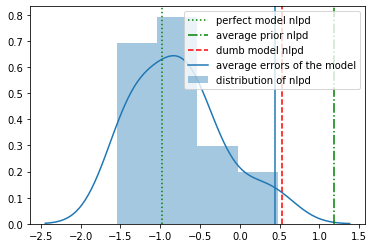

In [5]:
import numpy as np
import torch

seed = 42 #424
np.random.seed(seed)
torch.manual_seed(seed)
#NOTE! This only works for non cudnn. gpu needs
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

from helpers import showcase_code

import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
import pickle

from experimentation import ExperimentAnalyzer
import os
import time
import pandas as pd
import gc


means_dict = {}
stds_dict = {}
count_dict = {}
min_dict = {}
max_dict = {}


for file in files:
    plt.close()
    plt.clf()
    with  open(file_path+file, "rb") as f:
        exp = pickle.load(f)



    analyzer = ExperimentAnalyzer(exp)
    exp = None
    gc.collect()
    df1 = analyzer.analysis()
    print(f'\n\n\n\n /n/n/n{analyzer.experiment.model_name}')
    #print(df1.describe().to_latex())
    analyzer.get_outlier_indices()
    analyzer.plot_outcomes()
    plt.figure()
    df2 = analyzer.analysis()
    df2 = df2.replace([np.inf, -np.inf], np.nan)
    df2 = df2.dropna(1)
    print(len(df2))


    #print(df2.describe().to_latex())
    means_dict[analyzer.model_name] = df2.describe().loc['mean']
    
    try:
        means_dict[analyzer.model_name+' prior'] = {'nlpd': np.mean(analyzer.stats_dict['analysis']['prior_nlpd']),
                                                    'errors': np.mean(analyzer.stats_dict['analysis']['prior_test_errors']),
                                                    'cobeau': np.mean(analyzer.stats_dict['analysis']['prior_cobeau']),
                                                    'cobeau_p_vals': np.mean(analyzer.stats_dict['analysis']['prior_cobeau_p'])
                                                   }
    except Exception as e:
        print(analyzer.model_name)
        print(e)
    
    
    
    
    
    
    stds_dict[analyzer.model_name] = df2.describe().loc['std']
    
    try:
        stds_dict[analyzer.model_name+' prior'] = {'nlpd': np.std(analyzer.stats_dict['analysis']['prior_nlpd']),
                                                    'errors': np.std(analyzer.stats_dict['analysis']['prior_test_errors']),
                                                    'cobeau': np.std(analyzer.stats_dict['analysis']['prior_cobeau']),
                                                    'cobeau_p_vals': np.std(analyzer.stats_dict['analysis']['prior_cobeau_p'])
                                                   }
    except Exception as e:
        print(analyzer.model_name)
        print(e)
    
    
    
    
    count_dict[analyzer.model_name] = df2.describe().loc['count']
    min_dict[analyzer.model_name] = df2.describe().loc['min']
    max_dict[analyzer.model_name] = df2.describe().loc['max']
    
    
    
    

    analyzer.plot_models()

    analyzer.plot_models('cobeau')

    analyzer.plot_models('nlpd')
    analyzer.plot_distribution_of_metrics()

    gc.collect()


#     try:
#         analyzer.plot_outlier_models()



#     except Exception as e:
#         print(e)


    
    


In [6]:
analyzer.experiment.decay

0.0005

In [7]:
analyzer.experiment.non_linearity

torch.nn.modules.activation.Tanh

In [8]:
print(df2)

        nlpd    errors    cobeau  cobeau_p_vals
0   0.277604  0.530495  0.438691       0.068578
1  -0.096553  0.511461  0.485476       0.041116
2  -1.523935  0.400416  0.857616       0.000005
3  -1.312897  0.376662  0.724601       0.000671
4  -1.252071  0.443474  0.741714       0.000426
5  -0.638510  0.491153  0.800921       0.000065
6  -0.691550  0.472430  0.604893       0.007825
7  -0.890306  0.372171  0.539550       0.020834
8  -1.223491  0.441223  0.845990       0.000010
9  -1.198023  0.426281  0.757280       0.000273
10 -1.541609  0.350197  0.702834       0.001141
11 -0.362894  0.436176  0.285980       0.249965
12  0.477793  0.506763  0.535202       0.022092
13 -0.668565  0.427120  0.669596       0.002368
14 -0.745931  0.483767  0.623957       0.005651
15 -0.557222  0.429065  0.559157       0.015844
16 -0.952190  0.402312  0.824235       0.000026
17 -0.868267  0.409068  0.770507       0.000183
18 -1.421881  0.451137  0.883317       0.000001
19 -0.468707  0.452547  0.610325       0

In [9]:
df2.dropna(0)

,nlpd,errors,cobeau,cobeau_p_vals
0,0.277604,0.530495,0.438691,0.068578
1,-0.096553,0.511461,0.485476,0.041116
2,-1.523935,0.400416,0.857616,0.000005
3,-1.312897,0.376662,0.724601,0.000671
4,-1.252071,0.443474,0.741714,0.000426
5,-0.638510,0.491153,0.800921,0.000065
6,-0.691550,0.472430,0.604893,0.007825
7,-0.890306,0.372171,0.539550,0.020834
8,-1.223491,0.441223,0.845990,0.000010
9,-1.198023,0.426281,0.757280,0.000273


In [10]:
pd_means = pd.DataFrame.from_dict(means_dict)
pd_stds = pd.DataFrame.from_dict(stds_dict)
pd_means = pd.DataFrame.from_dict(means_dict)

In [11]:
# pd_means['prior'] = [np.mean(analyzer.stats_dict['analysis']['prior_nlpd']),
#                      np.mean(analyzer.stats_dict['analysis']['prior_test_errors']),
#                      np.mean(analyzer.stats_dict['analysis']['prior_cobeau']),
#                      np.mean(analyzer.stats_dict['analysis']['prior_cobeau_p'])]

In [12]:

pd_means = pd_means.dropna(1)
pd_means['train set mean/std'] = [analyzer.stupid_function_nlpd,analyzer.stupid_function_error, None, None][::-1]
if toy == 'True':
    pd_means['generating function'] = [analyzer.original_function_nlpd,analyzer.original_function_error , None, None][::-1]
pd_means = pd_means.round(2)

In [13]:
pd_means.head()

,BobstrapEnsemble,BootstrapEnsemble,BootstrapEnsemble prior,DropoutModel,DropoutModel prior,SaverModel,ShuffleEnsemble,ShuffleEnsemble prior,VanillaEnsemble,VanillaEnsemble prior,train set mean/std,generating function
cobeau,0.17,0.63,0.12,0.04,0.06,0.40,0.66,0.12,0.66,0.12,NaN,NaN
cobeau_p_vals,0.36,0.02,0.41,0.51,0.54,0.18,0.02,0.41,0.02,0.41,NaN,NaN
errors,0.45,0.44,0.89,0.46,0.90,0.45,0.44,0.89,0.44,0.89,0.89,0.28
nlpd,-0.23,-0.90,1.18,-0.56,15.23,0.81,-0.78,1.18,-0.78,1.18,0.53,-0.98


In [14]:
pd_means.T

,cobeau,cobeau_p_vals,errors,nlpd
BobstrapEnsemble,0.17,0.36,0.45,-0.23
BootstrapEnsemble,0.63,0.02,0.44,-0.90
BootstrapEnsemble prior,0.12,0.41,0.89,1.18
DropoutModel,0.04,0.51,0.46,-0.56
DropoutModel prior,0.06,0.54,0.90,15.23
SaverModel,0.40,0.18,0.45,0.81
ShuffleEnsemble,0.66,0.02,0.44,-0.78
ShuffleEnsemble prior,0.12,0.41,0.89,1.18
VanillaEnsemble,0.66,0.02,0.44,-0.78
VanillaEnsemble prior,0.12,0.41,0.89,1.18


In [15]:
pd_stds = pd_stds.dropna(1).round(2)
pd_stds.round(3).T

,cobeau,cobeau_p_vals,errors,nlpd
BobstrapEnsemble,0.29,0.31,0.07,0.72
BootstrapEnsemble,0.13,0.02,0.06,0.24
BootstrapEnsemble prior,0.26,0.30,0.00,0.37
DropoutModel,0.21,0.26,0.06,0.32
DropoutModel prior,0.23,0.34,0.02,2.59
SaverModel,0.23,0.24,0.06,2.32
ShuffleEnsemble,0.16,0.06,0.05,0.56
ShuffleEnsemble prior,0.26,0.30,0.00,0.37
VanillaEnsemble,0.16,0.06,0.05,0.56
VanillaEnsemble prior,0.26,0.30,0.00,0.37


In [16]:
import collections

In [17]:
stats_dict = collections.defaultdict(dict)
for row in pd_means.index:
    
    for col in pd_means.columns:

        
        
        
        
        
        try:
            stats_dict[row][col] = str(pd_means.loc[row][col]) + ' \\footnotesize$\pm$' + str(pd_stds.loc[row][col]) + '\normalsize'
        except:
            stats_dict[row][col] = pd_means.loc[row][col]

In [18]:
list(pd.DataFrame.from_dict(stats_dict).index)

['BobstrapEnsemble',
 'BootstrapEnsemble',
 'BootstrapEnsemble prior',
 'DropoutModel',
 'DropoutModel prior',
 'SaverModel',
 'ShuffleEnsemble',
 'ShuffleEnsemble prior',
 'VanillaEnsemble',
 'VanillaEnsemble prior',
 'train set mean/std',
 'generating function']

In [19]:
model_names_list = ['VanillaEnsemble', 'ShuffleEnsemble', 'BootstrapEnsemble', 'SaverModel', 'BobstrapEnsemble', 'DropoutModel']
model_names_list_bf = ['\textbf{{{}}}'.format(x) for x in model_names_list]

prior_names_list = [                                             'VanillaEnsemble prior',
                                           'ShuffleEnsemble prior',
                                             'BootstrapEnsemble prior',
                                             'DropoutModel prior',]
benchmark_names_list = [                                             'train set mean/std',
]
if toy == 'True':
    benchmark_names_list += [ 'generating function']

pd_stats = pd.DataFrame.from_dict(stats_dict).reindex(model_names_list+prior_names_list+benchmark_names_list)


In [20]:
model_names_list_bf

['\textbf{VanillaEnsemble}',
 '\textbf{ShuffleEnsemble}',
 '\textbf{BootstrapEnsemble}',
 '\textbf{SaverModel}',
 '\textbf{BobstrapEnsemble}',
 '\textbf{DropoutModel}']

In [21]:
model_names_list_bf+prior_names_list+benchmark_names_list

['\textbf{VanillaEnsemble}',
 '\textbf{ShuffleEnsemble}',
 '\textbf{BootstrapEnsemble}',
 '\textbf{SaverModel}',
 '\textbf{BobstrapEnsemble}',
 '\textbf{DropoutModel}',
 'VanillaEnsemble prior',
 'ShuffleEnsemble prior',
 'BootstrapEnsemble prior',
 'DropoutModel prior',
 'train set mean/std',
 'generating function']

In [22]:
rename_dict = {prev:after for prev,after in zip(model_names_list+prior_names_list+benchmark_names_list, model_names_list_bf+prior_names_list+benchmark_names_list)}

In [23]:
rename_dict

{'VanillaEnsemble': '\textbf{VanillaEnsemble}',
 'ShuffleEnsemble': '\textbf{ShuffleEnsemble}',
 'BootstrapEnsemble': '\textbf{BootstrapEnsemble}',
 'SaverModel': '\textbf{SaverModel}',
 'BobstrapEnsemble': '\textbf{BobstrapEnsemble}',
 'DropoutModel': '\textbf{DropoutModel}',
 'VanillaEnsemble prior': 'VanillaEnsemble prior',
 'ShuffleEnsemble prior': 'ShuffleEnsemble prior',
 'BootstrapEnsemble prior': 'BootstrapEnsemble prior',
 'DropoutModel prior': 'DropoutModel prior',
 'train set mean/std': 'train set mean/std',
 'generating function': 'generating function'}

In [24]:
pd_stats.rename(rename_dict, axis='index',inplace=True)

In [25]:
col_rename_dict = {x:f'\textbf{{{x}}}' for x in pd_stats.columns}
col_rename_dict['cobeau_p_vals'] = '\textbf{cobeau p-vals}'

In [26]:
pd_stats.rename(col_rename_dict,axis = 'columns',inplace=True)

In [27]:
pd_stats

,\textbf{cobeau},\textbf{cobeau p-vals},\textbf{errors},\textbf{nlpd}
\textbf{VanillaEnsemble},0.66 \footnotesize$\pm$0.16\normalsize,0.02 \footnotesize$\pm$0.06\normalsize,0.44 \footnotesize$\pm$0.05\normalsize,-0.78 \footnotesize$\pm$0.56\normalsize
\textbf{ShuffleEnsemble},0.66 \footnotesize$\pm$0.16\normalsize,0.02 \footnotesize$\pm$0.06\normalsize,0.44 \footnotesize$\pm$0.05\normalsize,-0.78 \footnotesize$\pm$0.56\normalsize
\textbf{BootstrapEnsemble},0.63 \footnotesize$\pm$0.13\normalsize,0.02 \footnotesize$\pm$0.02\normalsize,0.44 \footnotesize$\pm$0.06\normalsize,-0.9 \footnotesize$\pm$0.24\normalsize
\textbf{SaverModel},0.4 \footnotesize$\pm$0.23\normalsize,0.18 \footnotesize$\pm$0.24\normalsize,0.45 \footnotesize$\pm$0.06\normalsize,0.81 \footnotesize$\pm$2.32\normalsize
\textbf{BobstrapEnsemble},0.17 \footnotesize$\pm$0.29\normalsize,0.36 \footnotesize$\pm$0.31\normalsize,0.45 \footnotesize$\pm$0.07\normalsize,-0.23 \footnotesize$\pm$0.72\normalsize
\textbf{DropoutModel},0.04 \footnotesize$\pm$0.21\normalsize,0.51 \footnotesize$\pm$0.26\normalsize,0.46 \footnotesize$\pm$0.06\normalsize,-0.56 \footnotesize$\pm$0.32\normalsize
VanillaEnsemble prior,0.12 \footnotesize$\pm$0.26\normalsize,0.41 \footnotesize$\pm$0.3\normalsize,0.89 \footnotesize$\pm$0.0\normalsize,1.18 \footnotesize$\pm$0.37\normalsize
ShuffleEnsemble prior,0.12 \footnotesize$\pm$0.26\normalsize,0.41 \footnotesize$\pm$0.3\normalsize,0.89 \footnotesize$\pm$0.0\normalsize,1.18 \footnotesize$\pm$0.37\normalsize
BootstrapEnsemble prior,0.12 \footnotesize$\pm$0.26\normalsize,0.41 \footnotesize$\pm$0.3\normalsize,0.89 \footnotesize$\pm$0.0\normalsize,1.18 \footnotesize$\pm$0.37\normalsize
DropoutModel prior,0.06 \footnotesize$\pm$0.23\normalsize,0.54 \footnotesize$\pm$0.34\normalsize,0.9 \footnotesize$\pm$0.02\normalsize,15.23 \footnotesize$\pm$2.59\normalsize


In [28]:
list(pd_stats.columns)

['\textbf{cobeau}',
 '\textbf{cobeau p-vals}',
 '\textbf{errors}',
 '\textbf{nlpd}']

In [29]:
cols = ['\textbf{errors}',
 '\textbf{nlpd}',
         '\textbf{cobeau}',
 '\textbf{cobeau p-vals}',
]
pd_stats = pd_stats[cols]

In [30]:
print(pd_stats.to_latex(na_rep ='-',bold_rows =False, escape=False))

\begin{tabular}{lllll}
\toprule
{} &                         \textbf{errors} &                            \textbf{nlpd} &                         \textbf{cobeau} &                  \textbf{cobeau p-vals} \\
\midrule
\textbf{VanillaEnsemble}   &  0.44 \footnotesize$\pm$0.05\normalsize &  -0.78 \footnotesize$\pm$0.56\normalsize &  0.66 \footnotesize$\pm$0.16\normalsize &  0.02 \footnotesize$\pm$0.06\normalsize \\
\textbf{ShuffleEnsemble}   &  0.44 \footnotesize$\pm$0.05\normalsize &  -0.78 \footnotesize$\pm$0.56\normalsize &  0.66 \footnotesize$\pm$0.16\normalsize &  0.02 \footnotesize$\pm$0.06\normalsize \\
\textbf{BootstrapEnsemble} &  0.44 \footnotesize$\pm$0.06\normalsize &   -0.9 \footnotesize$\pm$0.24\normalsize &  0.63 \footnotesize$\pm$0.13\normalsize &  0.02 \footnotesize$\pm$0.02\normalsize \\
\textbf{SaverModel}        &  0.45 \footnotesize$\pm$0.06\normalsize &   0.81 \footnotesize$\pm$2.32\normalsize &   0.4 \footnotesize$\pm$0.23\normalsize &  0.18 \footnotesize$\pm$0.24\no

In [31]:
from platform import python_version

print(python_version())


3.7.4


# model table

In [31]:
from nn_models.base_model import get_toy_model,get_kaggle_model
import torch
from torchsummary import summary
import collections
import pandas as pd
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = get_toy_model(1,torch.nn.LeakyReLU,0).to(device)
summary(model, (0,1))
model_dict = collections.defaultdict(dict)
for name, get_func in zip(['toy','housing'],[get_toy_model, get_kaggle_model]):
    model = get_func(1,torch.nn.LeakyReLU,0)
    model_params = [x.out_features for x in list(model) if hasattr(x,'out_features')]
    model_dict[name]['layer sizes'] = model_params
    model_dict[name]['non-linearity'] = 'Tanh'
    print(model)
a = pd.DataFrame.from_dict(model_dict)
a

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 0, 100]             200
           Dropout-2               [-1, 0, 100]               0
         LeakyReLU-3               [-1, 0, 100]               0
            Linear-4               [-1, 0, 100]          10,100
           Dropout-5               [-1, 0, 100]               0
         LeakyReLU-6               [-1, 0, 100]               0
            Linear-7                [-1, 0, 10]           1,010
           Dropout-8                [-1, 0, 10]               0
         LeakyReLU-9                [-1, 0, 10]               0
           Linear-10                 [-1, 0, 1]              11
Total params: 11,321
Trainable params: 11,321
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.04
Estimated Tot

,toy,housing
layer sizes,"[100, 100, 10, 1]","[500, 500, 15, 1]"
non-linearity,Tanh,Tanh


In [32]:
print(a.to_latex())

\begin{tabular}{lll}
\toprule
{} &                toy &            housing \\
\midrule
layer sizes   &  [100, 100, 10, 1] &  [500, 500, 15, 1] \\
non-linearity &               Tanh &               Tanh \\
\bottomrule
\end{tabular}



In [33]:
torch.nn.ReLU

torch.nn.modules.activation.ReLU